In [1]:
import os
import numpy as np
import scipy.io
import pandas as pd
from pathlib import Path

In [2]:
database = pd.DataFrame(columns=['condition', 'name', 'ecg'])

# Create initial empty pandas database

In [3]:
from libraries.io import FileWizard

path1 = 'C:/Users/Oliver/Documents/FYP/code/database/MLII/'

fw = FileWizard()
database = fw.start(path1, database)
    
# Database details:

# The data contains 1000 ECG signals of size 3600
# There are 17 different heart rhythms in the dataset

# Conditions:

    # 1 NSR = Normal Sinus Rhythm [283 items]
    # 2 APB = Atrial Premature Beat [66 items]
    # 3 AFL = Atrial Flutter [20 items]
    # 4 AFIB = Atrial Fibrilation [135 items]
    # 5 SVTA = Superventricular tachycardia (abnormally fast heart beat above ventricular area) [13 items]
    # 6 WPW = Wolf-Parkinson White Syndrome [21 items]
    # 7 

In [4]:
print(database.head(5))

  condition      name                                                ecg
0     1 NSR  100m (0)  [953, 951, 949, 948, 950, 950, 951, 948, 946, ...
1     1 NSR  100m (1)  [915, 927, 934, 936, 935, 938, 938, 936, 935, ...
2     1 NSR  100m (2)  [989, 984, 981, 981, 983, 987, 984, 982, 982, ...
3     1 NSR  100m (3)  [957, 961, 961, 960, 960, 961, 964, 968, 968, ...
4     1 NSR  100m (4)  [942, 943, 943, 944, 948, 954, 955, 954, 955, ...


In [5]:
import matplotlib.pyplot as plt

def plot_example(case, data, title):
    examples = data[data['condition'] == case]
    example = examples.iloc[1]
    example_ecg = example['ecg']
    
    plt.figure(figsize=(15,4))
    plt.title(title)
    plt.plot(example_ecg)
    plt.show()

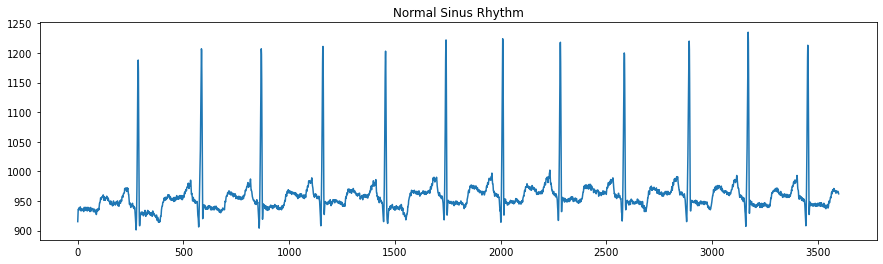

In [6]:
plot_example('1 NSR', database, 'Normal Sinus Rhythm')

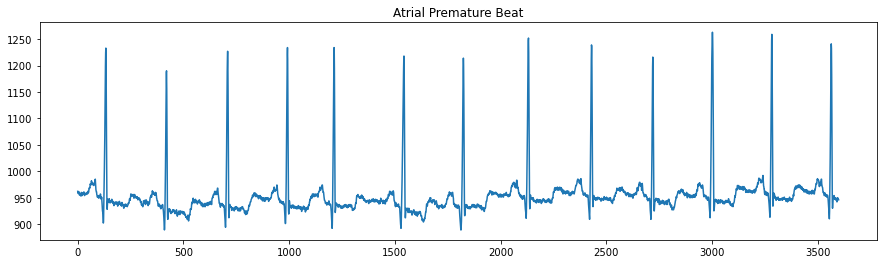

In [7]:
plot_example('2 APB', database, 'Atrial Premature Beat')

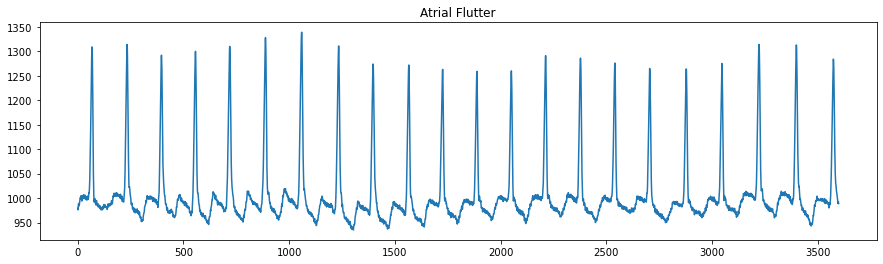

In [8]:
plot_example('3 AFL', database, 'Atrial Flutter')

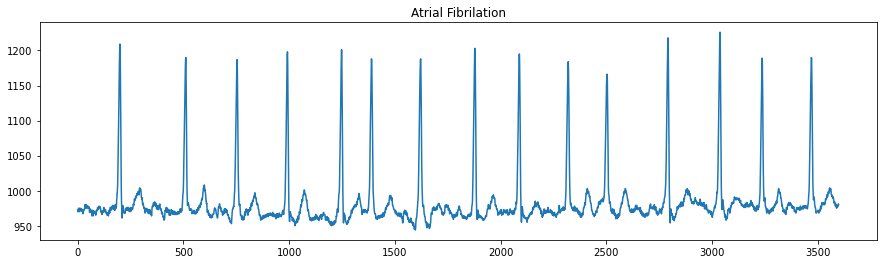

In [9]:
plot_example('4 AFIB', database, 'Atrial Fibrilation')

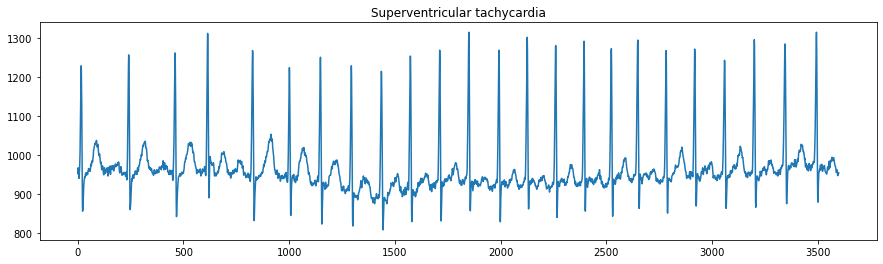

In [10]:
plot_example('5 SVTA', database, 'Superventricular tachycardia')

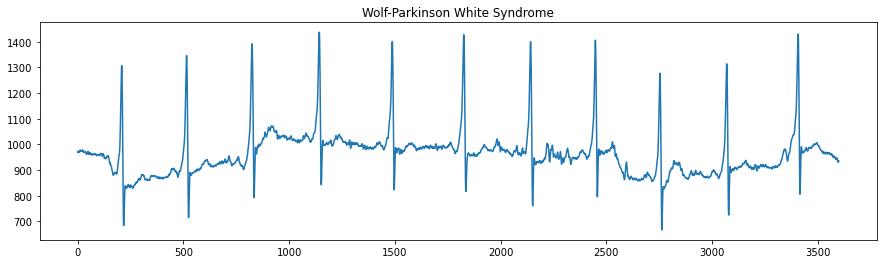

In [11]:
plot_example('6 WPW', database, 'Wolf-Parkinson White Syndrome')

In [13]:
from libraries.noise_removal import BaselineNoiseRemover

# DC Notch filter to remove baseline noise from all signals

bnr = BaselineNoiseRemover(c = -0.99)

ecg_waves = database['ecg'].tolist()
ecg_filt = []

for wave in ecg_waves:
    filt = bnr.fit(wave)
    ecg_filt.append(filt)

database['ecg'] = pd.Series(ecg_filt)

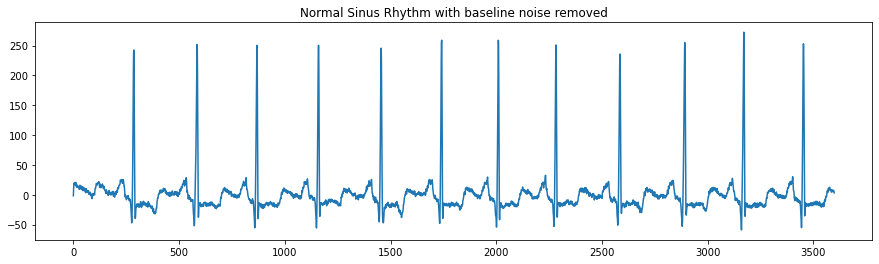

In [14]:
plot_example('1 NSR', database, 'Normal Sinus Rhythm with baseline noise removed')

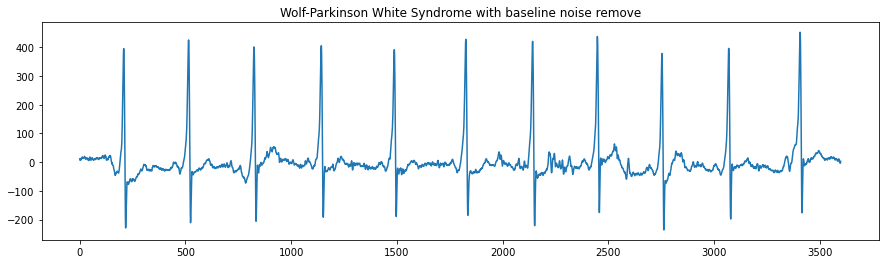

In [15]:
plot_example('6 WPW', database, 'Wolf-Parkinson White Syndrome with baseline noise remove')

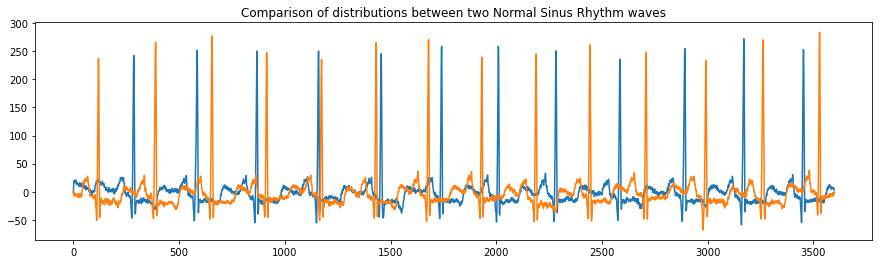

In [16]:
import seaborn as sns

examples = database[database['condition'] == '1 NSR']

example1 = examples.iloc[1]
example2 = examples.iloc[2]

ecg1 = example1['ecg']
ecg2 = example2['ecg']

plt.figure(figsize=(15,4))
plt.plot(ecg1)
plt.plot(ecg2)
plt.title('Comparison of distributions between two Normal Sinus Rhythm waves')
plt.show()

In [17]:
from libraries.distributions import DynamicTimeWarper

dtw = DynamicTimeWarper()

cost_matrix, path = dtw.fit(ecg1, ecg2)

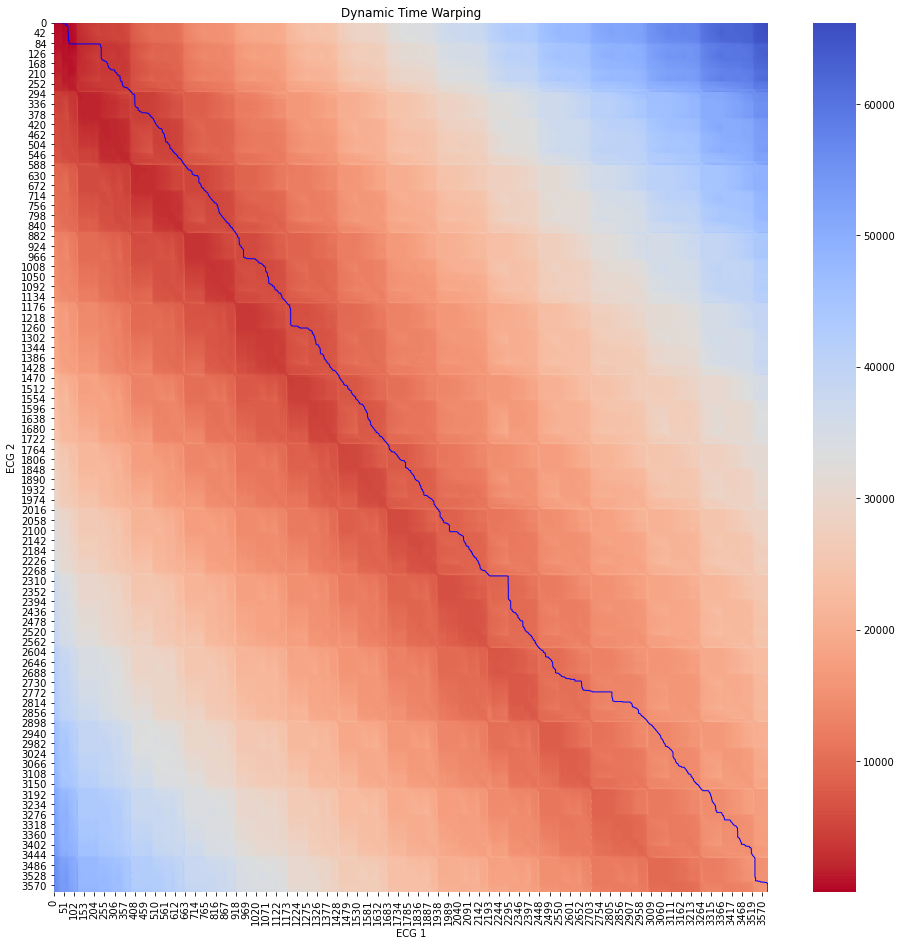

In [18]:
plt.figure(figsize=(16, 16))
ax = plt.axes()
sns.heatmap(cost_matrix, cmap='coolwarm_r', ax=ax)
ax.set_title("Dynamic Time Warping")
ax.set(xlabel='ECG 1', ylabel='ECG 2')

positions = path[1]
a = positions[:,1]
b = positions[:,0]
ax.plot(a + 0.5, b + 0.5, color='blue', linewidth=1)

In [19]:
from libraries.feature_extraction import LargeFrequencyExtractor

lfe = LargeFrequencyExtractor()
database = lfe.fit(database)
# Multilevel discrete decomposition to extract large frequencies from time series

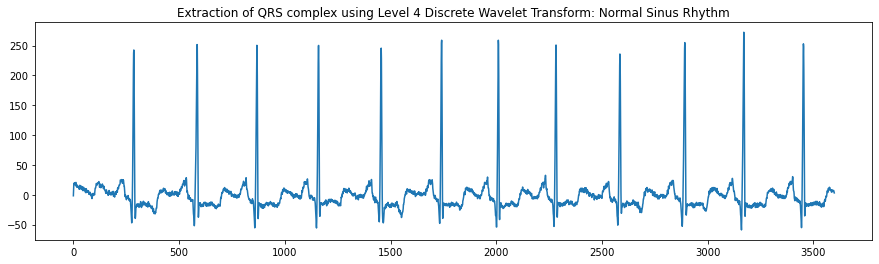

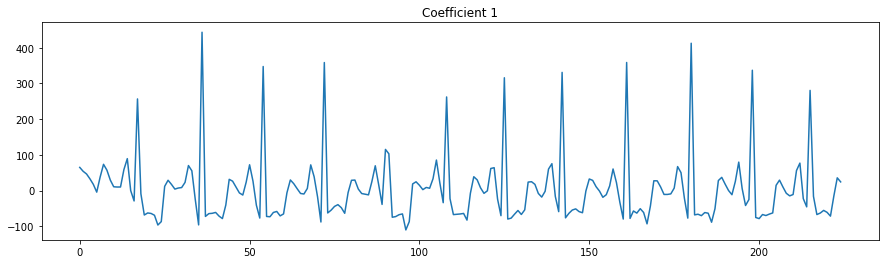

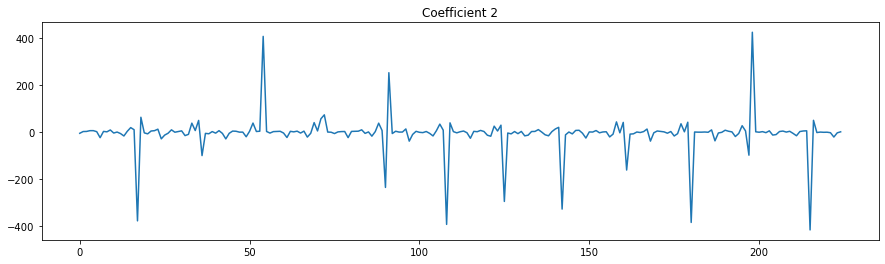

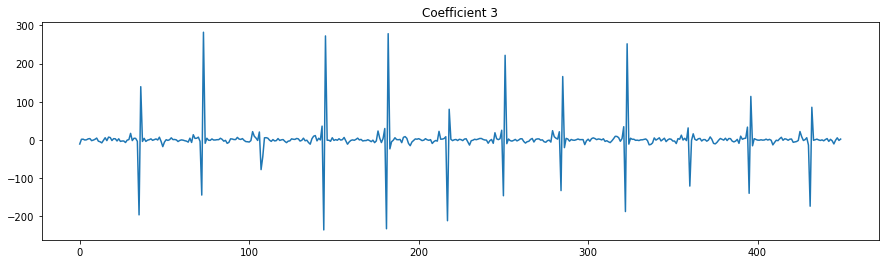

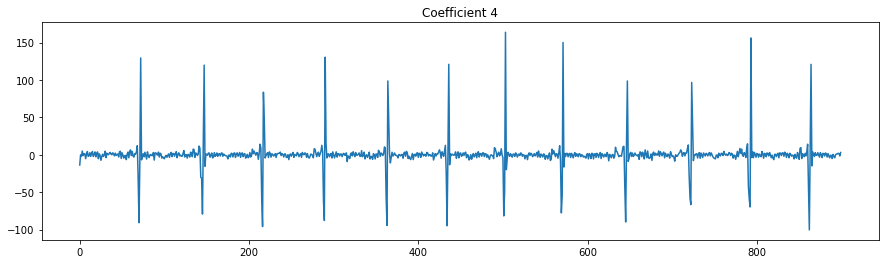

In [20]:
examples = database[database['condition'] == '1 NSR']
example1 = examples.iloc[1]

examples2 = database[database['condition'] == '3 AFL']
example2 = examples2.iloc[2]

plt.figure(figsize=(15,4))
plt.title('Extraction of QRS complex using Level 4 Discrete Wavelet Transform: Normal Sinus Rhythm')
plt.plot(example1['ecg'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 1')
plt.plot(example1['coefficient 1'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 2')
plt.plot(example1['coefficient 2'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 3')
plt.plot(example1['coefficient 3'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 4')
plt.plot(example1['coefficient 4'])
plt.show()

c1 = example1['coefficient 4']

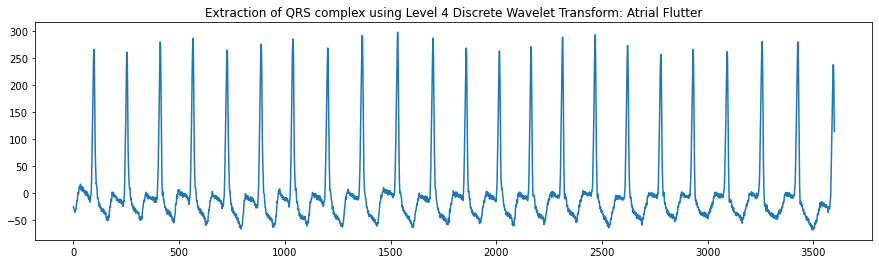

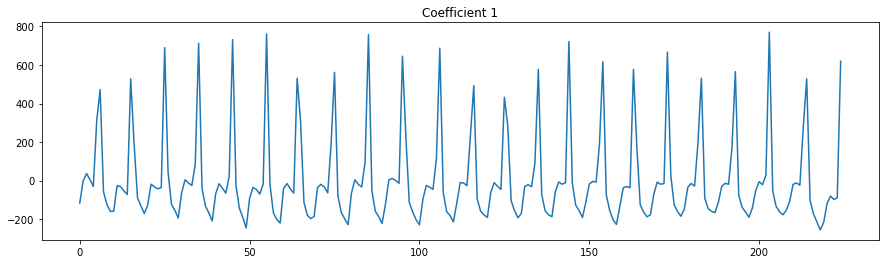

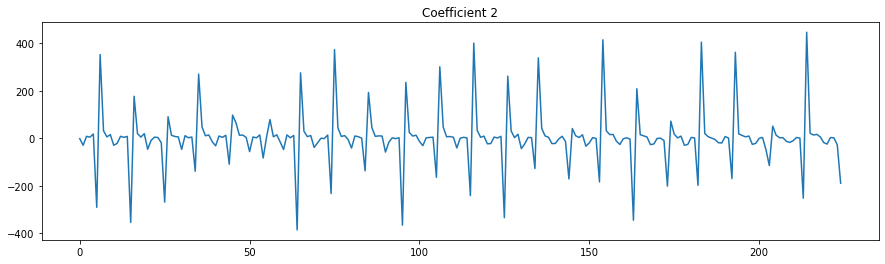

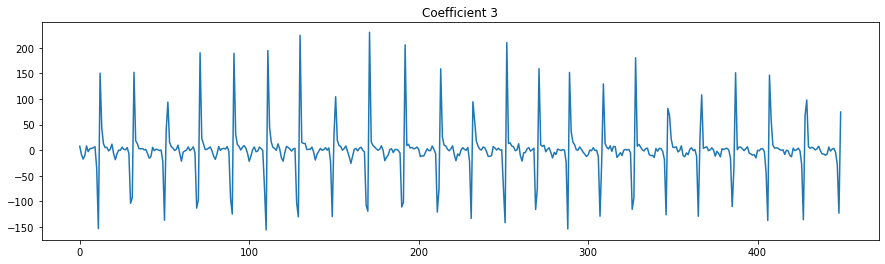

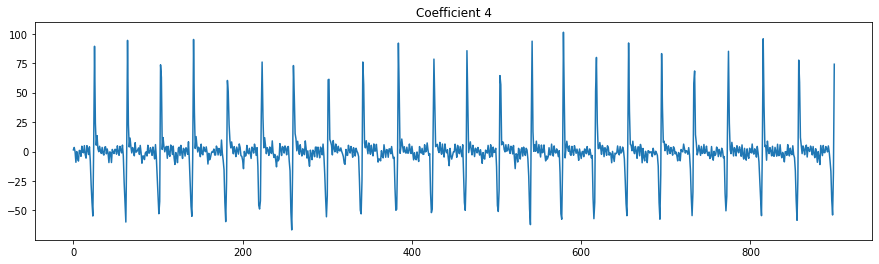

In [22]:
plt.figure(figsize=(15,4))
plt.title('Extraction of QRS complex using Level 4 Discrete Wavelet Transform: Atrial Flutter')
plt.plot(example2['ecg'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 1')
plt.plot(example2['coefficient 1'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 2')
plt.plot(example2['coefficient 2'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 3')
plt.plot(example2['coefficient 3'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 4')
plt.plot(example2['coefficient 4'])
plt.show()

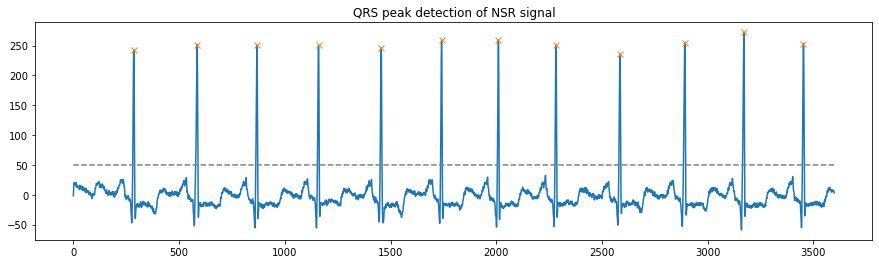

[ 286  585  868 1160 1456 1742 2010 2283 2585 2892 3171 3453] {'peak_heights': array([242.56545091, 251.65256927, 250.35477021, 250.18854416,
       245.62422576, 258.93750878, 258.89570261, 250.84811862,
       235.82262629, 254.90759565, 272.27683998, 252.82458944])}


In [27]:
from libraries.feature_extraction import PeakExtractor

thresh = 50
pe = PeakExtractor(c=thresh)
database = pe.fit(database)

examples = database[database['condition'] == '1 NSR']
example1 = examples.iloc[1]
peaks1 = example1['peaks']
position1 = example1['peak position']
ecg1 = example1['ecg']

plt.figure(figsize=(15,4))
plt.title('QRS peak detection of NSR signal')
plt.plot(ecg1)
plt.plot(peaks1, ecg1[peaks1], "x")
plt.plot(np.ones_like(ecg1) * thresh, "--", color="gray")
plt.show()

print(peaks1, position1) 

In [ ]:
from libraries.feature_extraction import MidPointExtractor

mpe = MidPointExtractor()
database = mpe.fit(database)

In [ ]:
examples = database[database['condition'] == '1 NSR']
example1 = examples.iloc[1]

print()

In [ ]:
plt.figure(figsize=(15,4))
plt.title('Optimal window detection of NSR signal')
plt.plot(ecg1)
for xv in midpoints_x:
    plt.axvline(x=xv, color='black', linestyle='--')
plt.show()

In [ ]:
mp = np.rint(midpoints_x)
mp = mp.astype(int)

for i, point in enumerate(mp):
    plt.title("Separation " + str(i + 1) + " of extracted feature")
    
    if i == 0:
        plt.plot(c1[0:mp[i]])
        plt.show()
    
    else:
        plt.plot(c1[mp[i - 1]:mp[i]])
        plt.show()
    

In [ ]:
#TODO

#Methodize the peak extraction/optimal window algorithm
#Try for multiple types of ECG
#Create a matrix stacking all separated features on top of each other
#PCA